# AUTORES

- ## Vago, Matias

- ## Vega, Sharim

- ## Grandinetti, Juan

- ## Scoflich, Lautaro

In [24]:
# Procesamiento y estructura de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [2]:
def Vertical(x):
  pprint(list(x))

# DATOS

## Carga

In [3]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Nuestro objetivo es intentar clasificar a los clientes como existentes o desertores de la entidad bancaria, a partir de las features dadas.

## Pre-Análisis

In [4]:
# Cantidad de muestras
len(df)

10127

In [5]:
# Features
pprint(len(df.columns))
Vertical(df.columns)

23
['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [6]:
df = df.drop( ["CLIENTNUM",
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
 axis=1)

In [7]:
# Features
pprint(len(df.columns))
Vertical(df.columns)

20
['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']


In [50]:
categoricas = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',]

numericas =['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
            ]

## Análisis exploratorio de datos

In [51]:
df[numericas].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


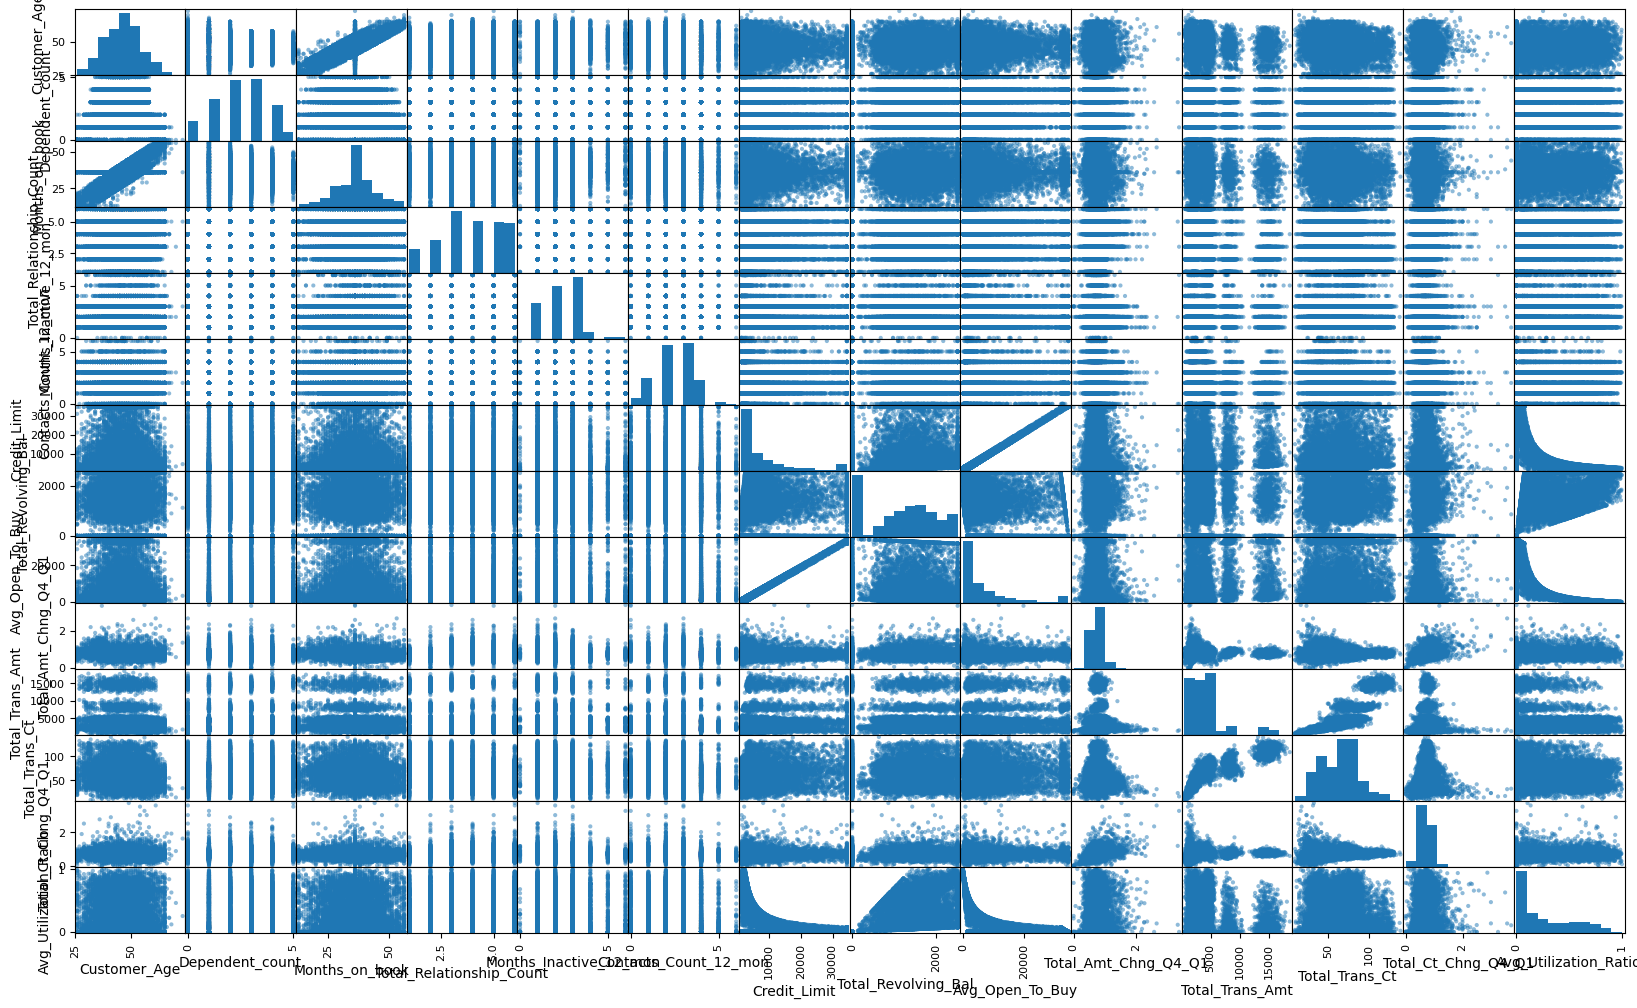

In [54]:
_ = pd.plotting.scatter_matrix(df, figsize = (20,12))

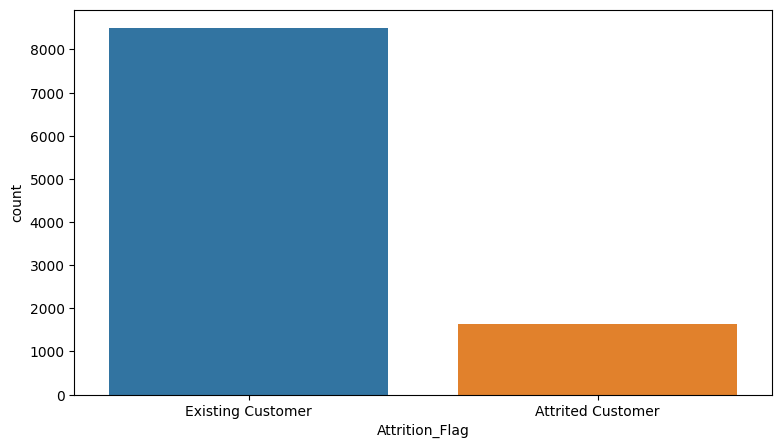

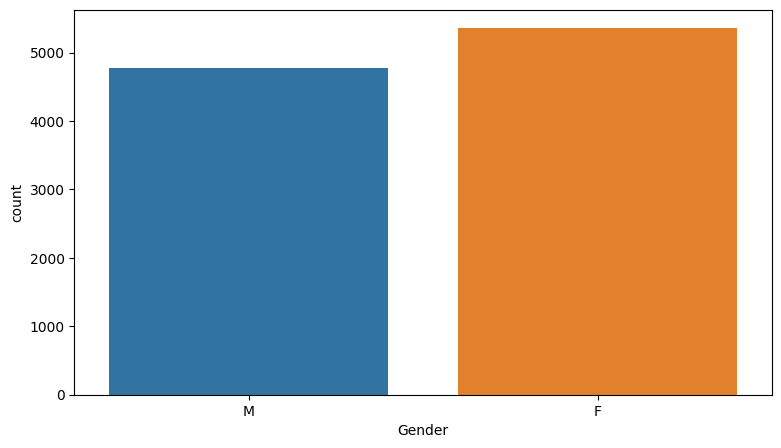

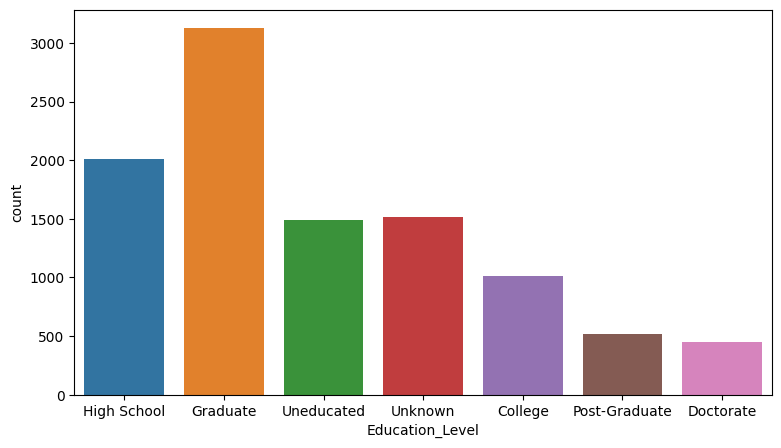

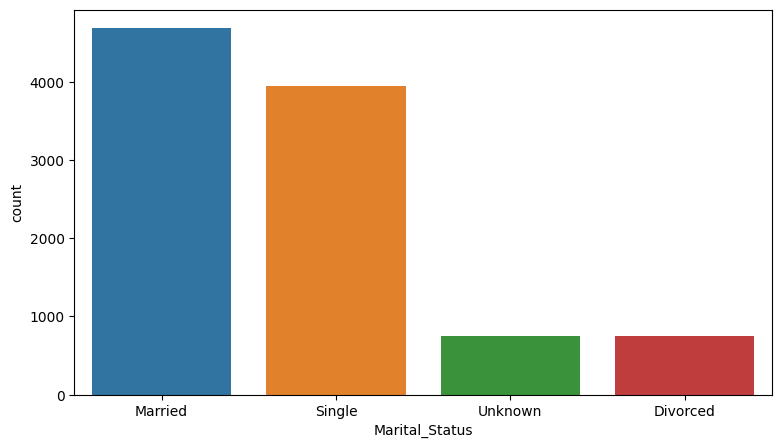

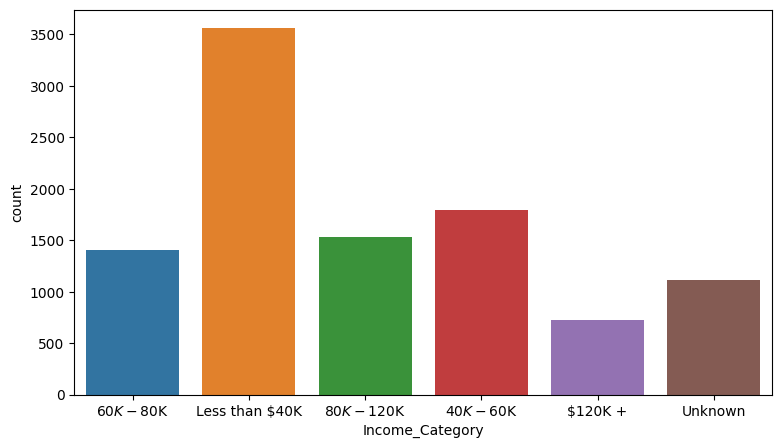

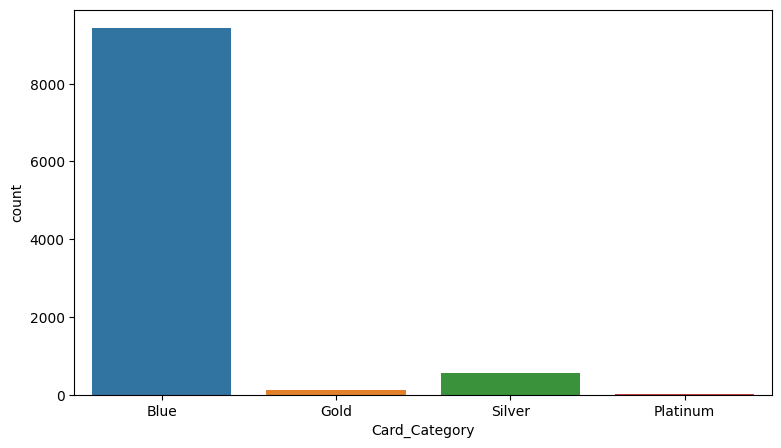

In [52]:
for i, col in enumerate(df[categoricas]):
    plt.figure(i, figsize=(9,5), dpi=100)
    sns.countplot(x=col, data=df[categoricas])

Gracias a estas visualizaciones, podemos extraer algunas conclusiones:

GENDER
- Podemos tratar a los clientes cuya situación es desconocida como solteros.

ATRITTION_FLAG
- Estamos frente a un problema desbalanceado, donde el estandard es que un cliente se quede en el banco. Debemos tenerlo en cuenta al momento de entrenar y evaluar al modelo, ya que no queremos que este simplemente se dedique a predecir a todos los clientes como "No Desertores".

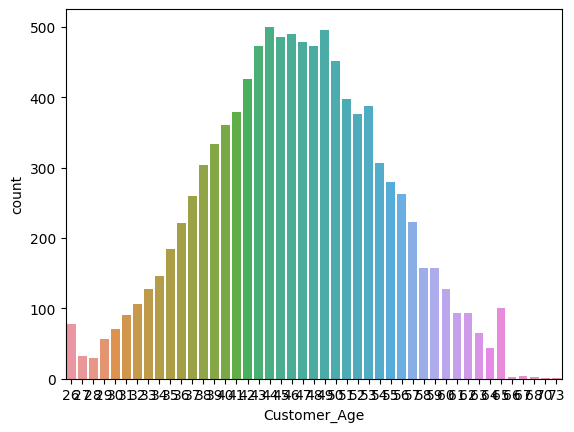

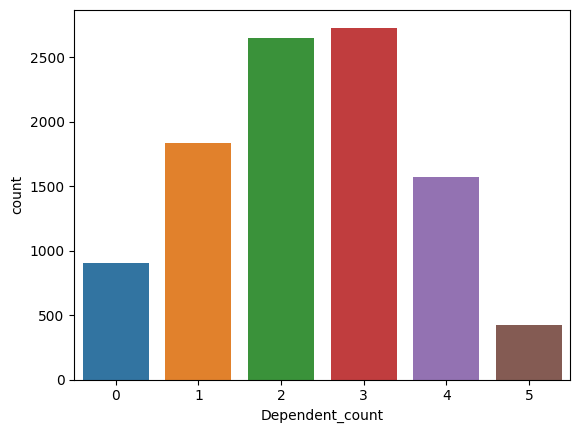

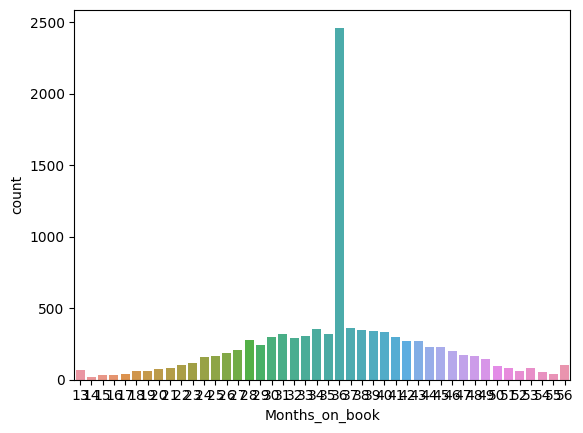

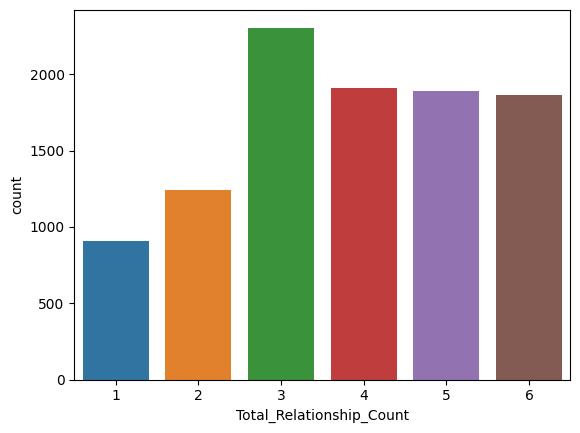

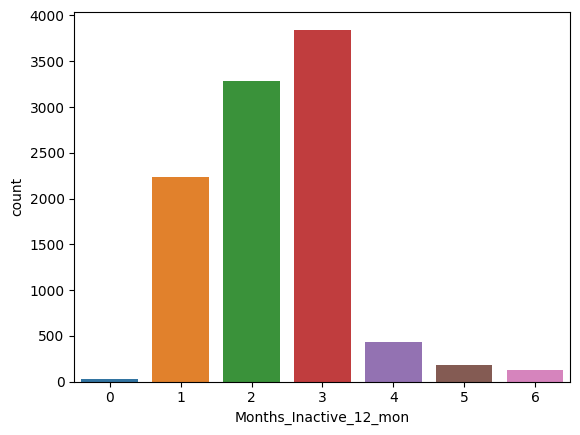

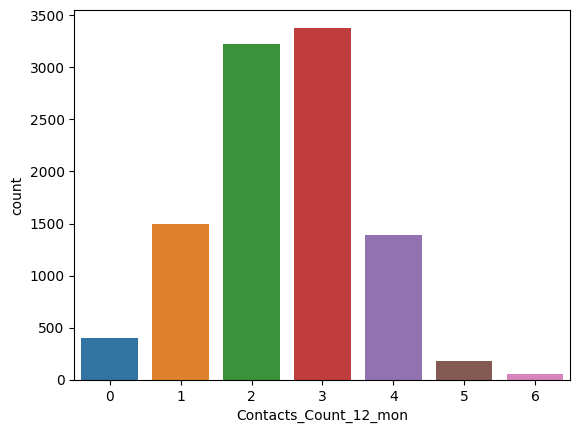

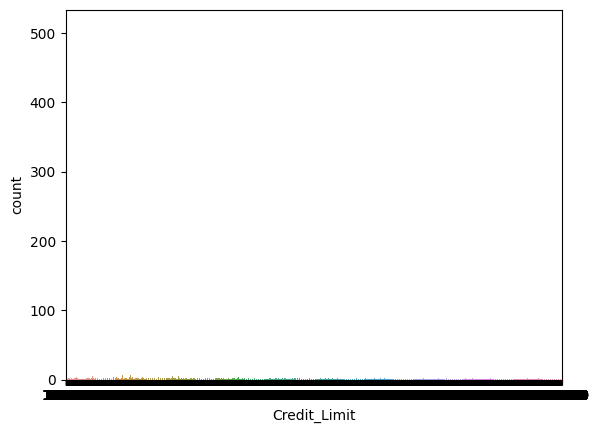

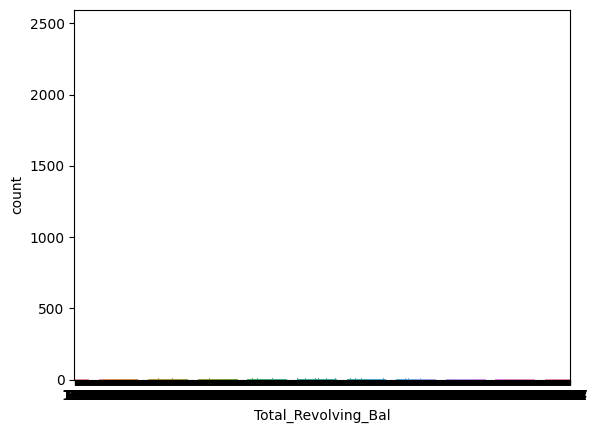

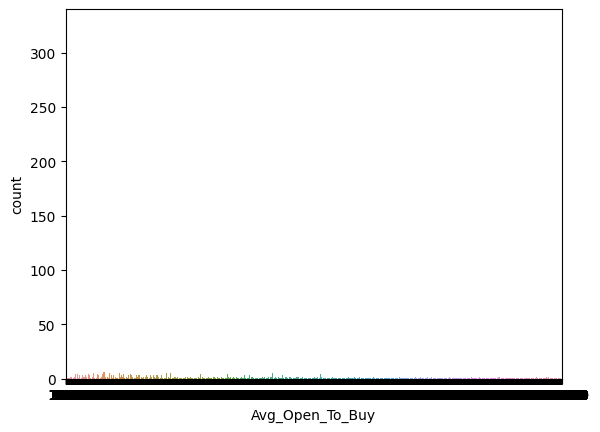

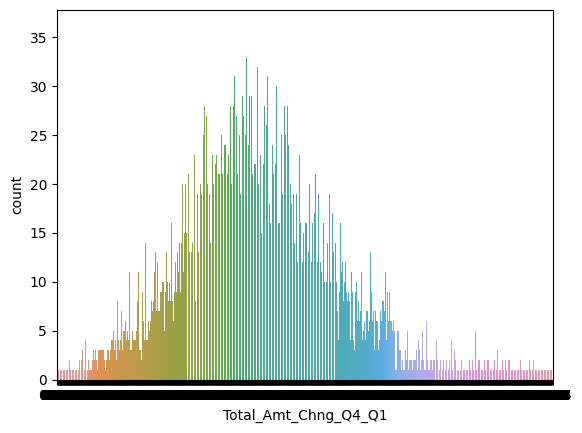

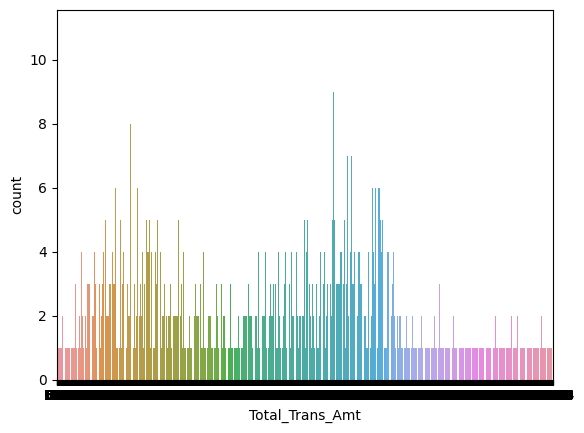

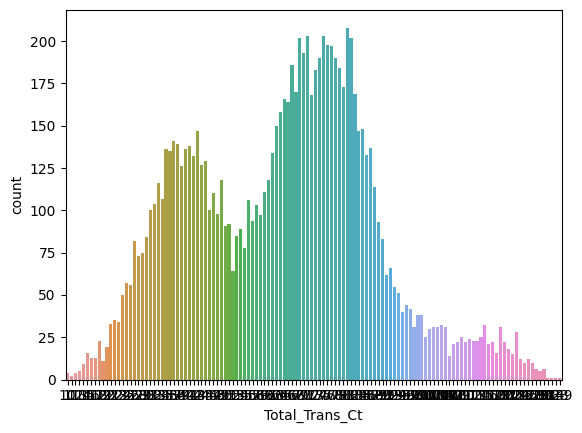

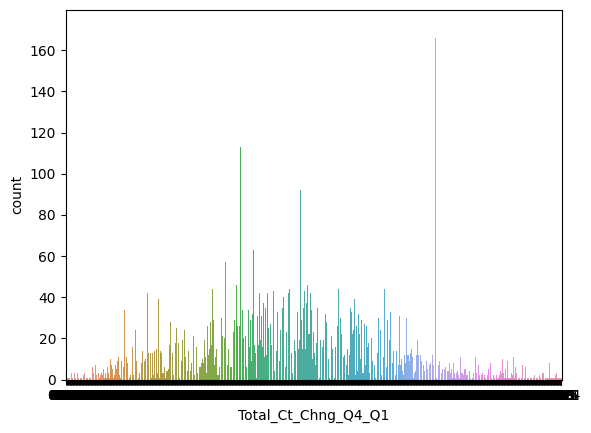

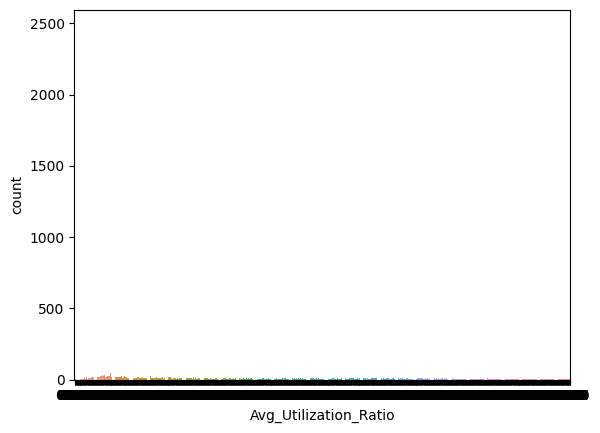

In [53]:
for i, col in enumerate(df[numericas].columns):
    plt.figure(i)
    sns.countplot(x=col, data=df[numericas])

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_16096\1675373384.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


Text(0.5, 1.0, 'Matriz de correlación')

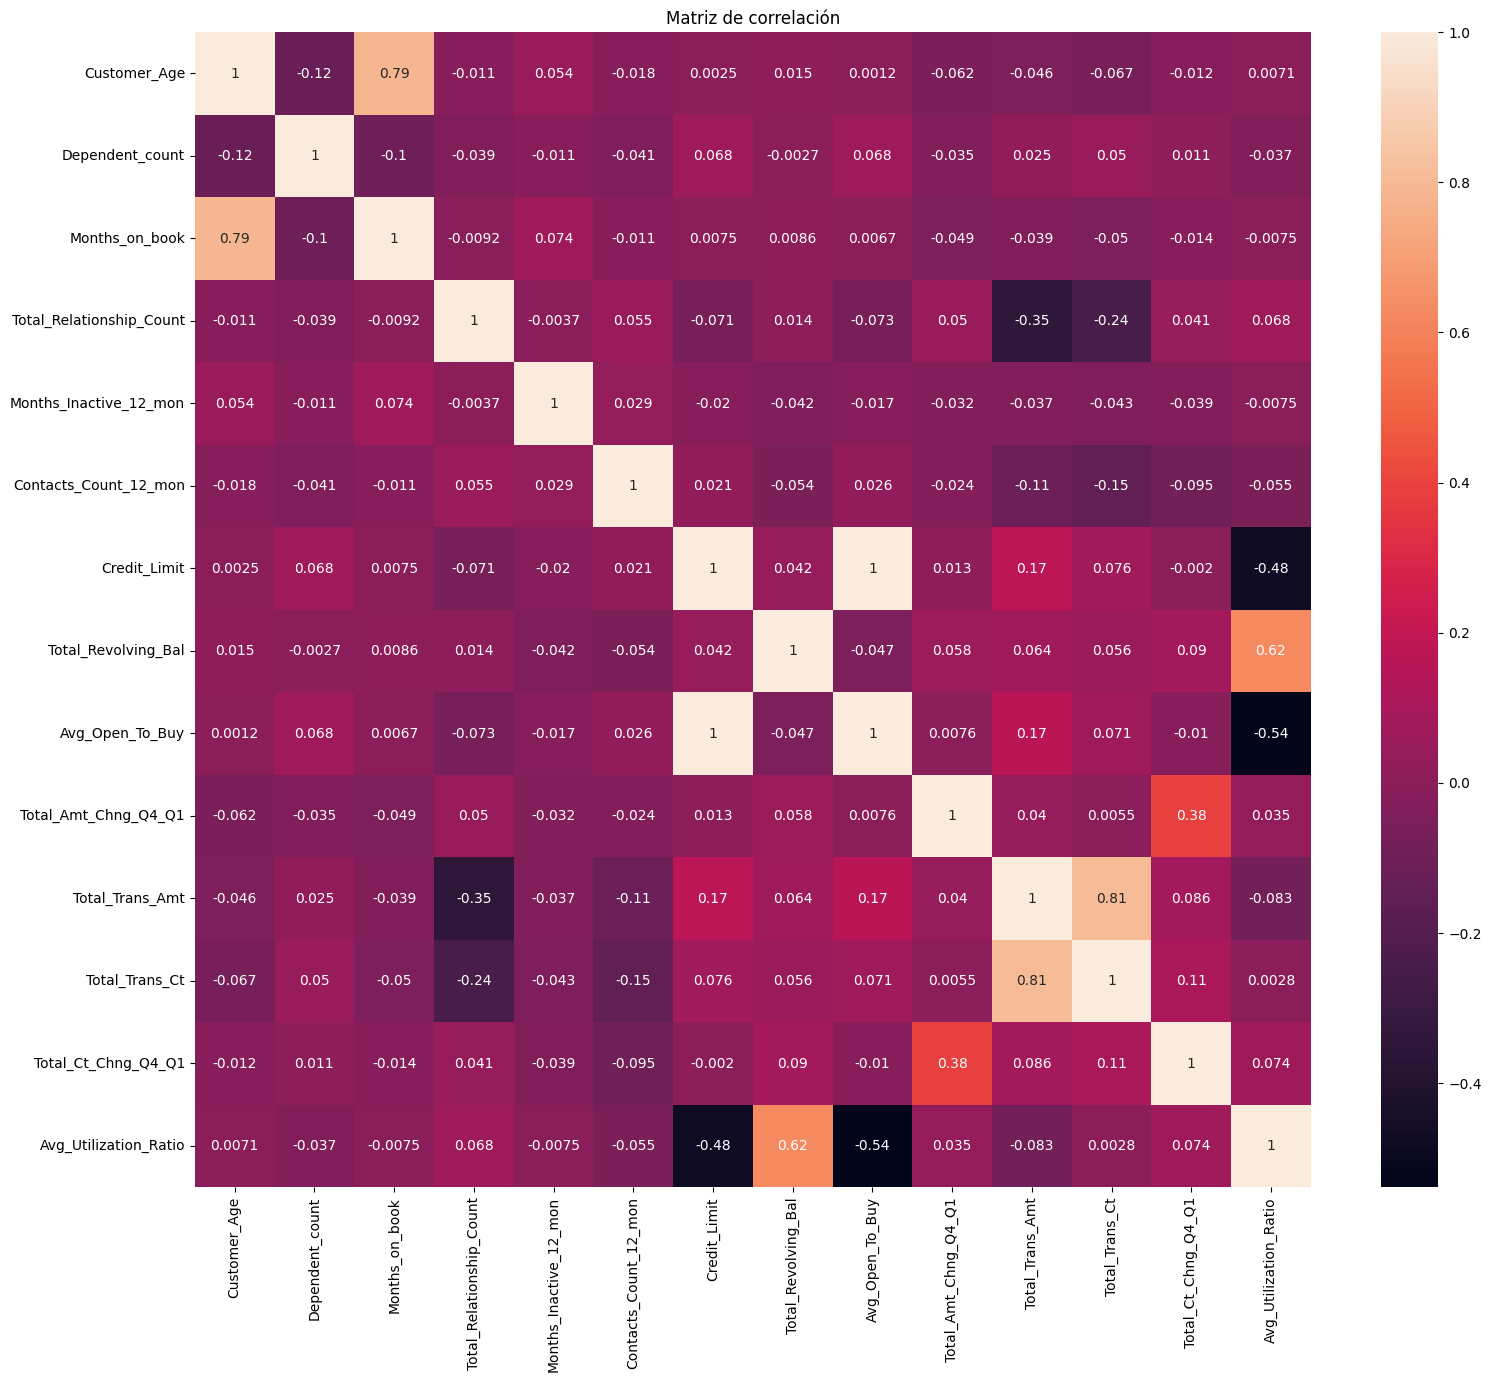

In [56]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True)

plt.title("Matriz de correlación")

### Rango salarial

In [57]:
Vertical(df["Income_Category"].unique())

['$60K - $80K',
 'Less than $40K',
 '$80K - $120K',
 '$40K - $60K',
 '$120K +',
 'Unknown']


In [61]:
Inc_dict = {'Less than $40K':'<40K' , '$40K - $60K':'40K - 60K', '$60K - $80K':'60K - 80K', '$80K - $120K':'80K - 120K', '$120K +': '>120K'}
df["Income_Category"] = df["Income_Category"].replace(Inc_dict)

df["Income_Category"].unique()

array(['60K - 80K', '<40K', '80K - 120K', '40K - 60K', '>120K', 'Unknown'],
      dtype=object)

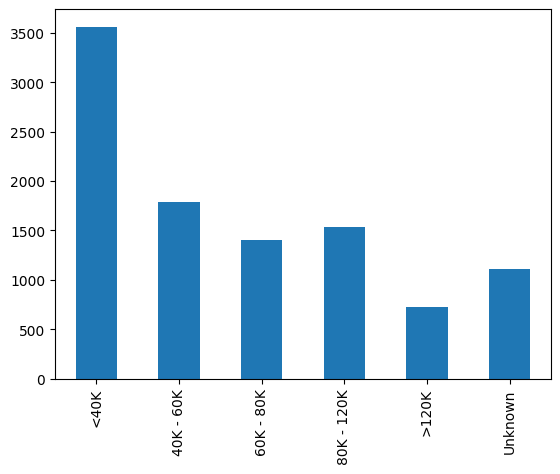

In [62]:
_ = df["Income_Category"].value_counts().loc[['<40K', '40K - 60K', '60K - 80K', '80K - 120K', '>120K', 'Unknown']].plot.bar()

### Ratio de utilizacióm

In [ ]:
_ = plt.hist(df["Avg_Utilization_Ratio"])